# Exploratory Data Analysis

1) Plotting the Number of Data Analyst Jobs per location in India
2) Plotting the Number of Work from home, Health Insurance and No degree status Jobs in India
3) Count of different companies in India

### 1) Plotting the Number of Data Analyst Jobs per location in India

In [25]:
# Importing Libraries

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [26]:
df_DA_IN = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')]



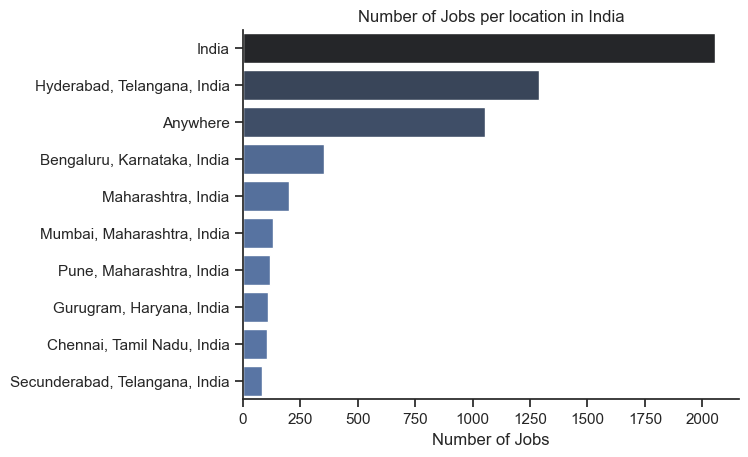

In [36]:
df_plot = df_DA_IN['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style= 'ticks')
sns.barplot(data= df_plot, x='count', y= 'job_location', hue='count', palette= 'dark:b_r', legend= False)
sns.despine()
plt.title('Number of Jobs per location in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


### 2) Plotting the Number of Work from home, Health Insurance and No degree status Jobs in India


In [31]:
df_DA_IN['job_no_degree_mention'].value_counts()

job_no_degree_mention
False    3934
True     2187
Name: count, dtype: int64

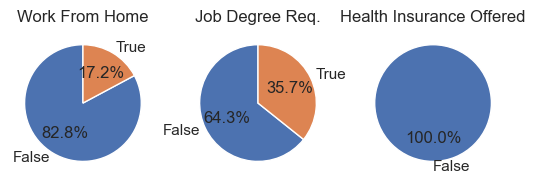

In [32]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}


# returns index as well as a tuple of column name and title name
for i, (column, title) in enumerate(dict_column.items()):
    if(i<2):   
        ax[i].pie(df_DA_IN[column].value_counts(), startangle=90,
              autopct='%1.1f%%', labels=['False', 'True'])
        ax[i].set_title(title)
    
    else: 
            ax[i].pie(df_DA_IN[column].value_counts(), startangle=90,
              autopct='%1.1f%%', labels=['False'])
            ax[i].set_title(title)

plt.show()    
fig.tight_layout()

### 3) Count of different companies in India ###

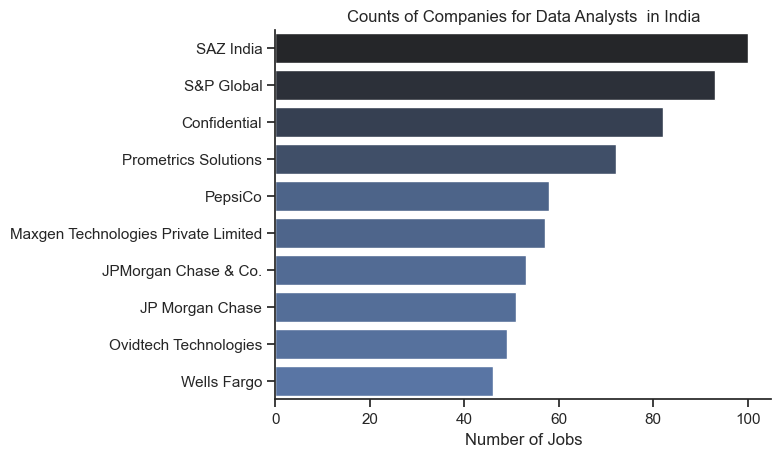

In [37]:
df_plot_name = df_DA_IN['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot_name, x='count', y='company_name',
            hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analysts  in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()